In [160]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [161]:
df=pd.read_csv('shupershop data.csv')

In [162]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [163]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()

In [164]:
x =  df.drop('Profit', axis=1)

In [165]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [166]:
y = df['Profit'] 

In [167]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [168]:
df.isnull().head()

,Marketing Spend,Administration,Transport,Area,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


# Measure of central Tendency

In [169]:
df.Transport.mean() #no outliers

215331.7324489796

In [170]:
df.Transport.median() #outliers exist


214634.81

<Axes: xlabel='Transport', ylabel='Count'>

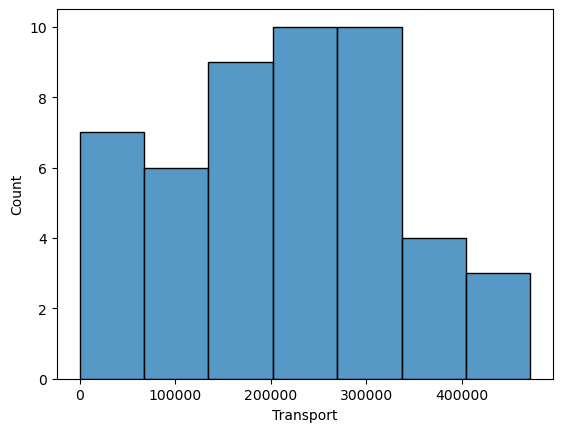

In [171]:
import seaborn as sns
sns.histplot(df.Transport)

In [172]:
mean = df.Transport.mean()
df.Transport = df.Transport.fillna(mean)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [173]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [174]:
mean

215331.7324489796

# Label encoder

In [175]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
le = LabelEncoder()

In [178]:
df1.Area = le.fit_transform(df[['Area']])

In [179]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [180]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [181]:
le.transform(le.classes_)

array([0, 1, 2])

# Decode the encoded values back to original classes

In [182]:
#df.Area = decoded_classes = le.inverse_transform(df1.Area)
decoded_classes = le.inverse_transform(df1.Area)
decoded_classes

array(['Dhaka', 'Ctg', 'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg', 'Rangpur', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Dhaka', 'Rangpur', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Dhaka',
       'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg'],
      dtype=object)

In [183]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [184]:
#After decoding
df1.Area = decoded_classes
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Label Encoding with Label mapping

In [185]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [186]:
label_mapping = {'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [187]:
label_mapping

{'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [188]:
label_mapping.keys()

dict_keys(['Dhaka', 'Rangpur', 'Ctg'])

In [189]:
label_mapping.values()

dict_values([1, 2, 0])

In [190]:
df2.Area = [label_mapping[area] for area in df2.Area]

In [191]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [192]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# replace method

In [193]:
df3['Area'] = df3['Area'].replace(label_mapping) 

In [194]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoder

In [220]:
df4 = pd.read_csv('shupershop data.csv')
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [221]:
pd.get_dummies(df4['Area']).head()  

,Ctg,Dhaka,Rangpur
0,False,True,False
1,True,False,False
2,False,False,True
3,False,True,False
4,False,False,True


In [212]:
dummy = pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep='_' )

In [213]:
df4.drop('Area', axis=1, inplace=True)

In [214]:
df4.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [215]:
dummy.head()

,Area_Dhaka,Area_Rangpur
0,True,False
1,False,False
2,False,True
3,True,False
4,False,True


In [216]:

new_df4 = pd.concat([df4, dummy], axis=1)

In [217]:
new_df4.head()

,Marketing Spend,Administration,Transport,Profit,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,192261.83,True,False
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True
3,144372.41,118671.85,383199.62,182901.99,True,False
4,142107.34,91391.77,366168.42,166187.94,False,True


# Ordinal Encoder

In [203]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [204]:
df5.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [205]:
from sklearn.preprocessing import OrdinalEncoder

In [206]:
ordinal = OrdinalEncoder(categories = [['Dhaka', 'Ctg', 'Rangpur']])

In [207]:
df5.Area = ordinal.fit_transform(df5[['Area']])

In [208]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94
